In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

# 기본모델 : DecisionTree - 성능 기준
# 배깅, 부스팅, 랜덤배깅 모델 튜닝

클래스가 타깃변수
## 분석의 목적 : 학력, 교육, 연수, 혼인 상태, 직업 정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지

age: 나이
workclass: 직업군
education: 교육 수준
education-num: 교육 연수
marital-status: 결혼 상태
occupation: 직업
relationship: 가족 관계
race: 인종
sex: 성별
capital-gain: 자본 소득
capital-loss: 자본 손실
hours-per-week: 주당 근로 시간
native-country: 출신 국가
class: 소득 등급

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [7]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [8]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [9]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [10]:
data['native-country'].unique()

array([' United-States', nan, ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

In [11]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

### 방법1. 최빈값으로 대치

In [12]:
data['workclass'].fillna('Private', inplace=True)

C:\Users\김민정\AppData\Local\Temp\ipykernel_9972\2358352276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna('Private', inplace=True)


In [13]:
data['occupation'].fillna('Prof-specialty', inplace=True)

C:\Users\김민정\AppData\Local\Temp\ipykernel_9972\1939604981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].fillna('Prof-specialty', inplace=True)


In [14]:
data['native-country'].fillna('United-States', inplace=True)

C:\Users\김민정\AppData\Local\Temp\ipykernel_9972\607774723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].fillna('United-States', inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [16]:
data2 = data.copy()

In [17]:
data2['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2080        1
155         1
2201        1
Name: count, Length: 99, dtype: int64

In [18]:
data.groupby('occupation')['capital-loss'].value_counts()

occupation      capital-loss
 Adm-clerical   0               5416
                1902              16
                1887              13
                2001              11
                1590               8
                                ... 
Prof-specialty  2392               1
                2415               1
                2465               1
                2489               1
                2824               1
Name: count, Length: 582, dtype: int64

In [19]:
data2 = pd.get_dummies(data, drop_first=True)
data2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,class_ >50K
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,10,0,0,30,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


* data = 결측값 => 최빈값으로 대치
* data2 = 결측값 => 최빈값으로 대치 후 더미변수 생성

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         48842 non-null  int64
 1   education-num                               48842 non-null  int64
 2   capital-gain                                48842 non-null  int64
 3   capital-loss                                48842 non-null  int64
 4   hours-per-week                              48842 non-null  int64
 5   workclass_ Local-gov                        48842 non-null  bool 
 6   workclass_ Never-worked                     48842 non-null  bool 
 7   workclass_ Private                          48842 non-null  bool 
 8   workclass_ Self-emp-inc                     48842 non-null  bool 
 9   workclass_ Self-emp-not-inc                 48842 non-null  bool 
 10  workclass_ State-gov             

In [22]:
X2 = data2.drop('class_ >50K', axis=1)
y2 = data2['class_ >50K']

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=7)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
dtc = DecisionTreeClassifier(max_depth = 17, random_state=7)
dtc.fit(X2_train, y2_train)
pred = dtc.predict(X2_test)
print("accuracy_score", accuracy_score(y2_test, pred))
print(classification_report(y2_test, pred))

accuracy_score 0.8468625243115979
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      7459
        True       0.71      0.60      0.65      2310

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [39]:
X2_train.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'workclass_Private', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation

[Text(0.5799482587794221, 0.9722222222222222, 'marital-status_ Married-civ-spouse <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29696, 9377]'),
 Text(0.31862674759502385, 0.9166666666666666, 'capital-gain <= 7055.5\ngini = 0.121\nsamples = 21236\nvalue = [19858, 1378]'),
 Text(0.449287503187223, 0.9444444444444444, 'True  '),
 Text(0.22438666287522666, 0.8611111111111112, 'education-num <= 12.5\ngini = 0.092\nsamples = 20853\nvalue = [19845, 1008]'),
 Text(0.15400530311933383, 0.8055555555555556, 'capital-loss <= 2218.5\ngini = 0.047\nsamples = 16707\nvalue = [16305, 402]'),
 Text(0.10332321116781949, 0.75, 'age <= 33.5\ngini = 0.043\nsamples = 16638\nvalue = [16268, 370]'),
 Text(0.05579187932308106, 0.6944444444444444, 'hours-per-week <= 49.5\ngini = 0.014\nsamples = 9540\nvalue = [9471, 69]'),
 Text(0.03957612819824055, 0.6388888888888888, 'marital-status_ Married-AF-spouse <= 0.5\ngini = 0.009\nsamples = 8671\nvalue = [8633, 38]'),
 Text(0.03587107984688738, 0.5833333333333334, '

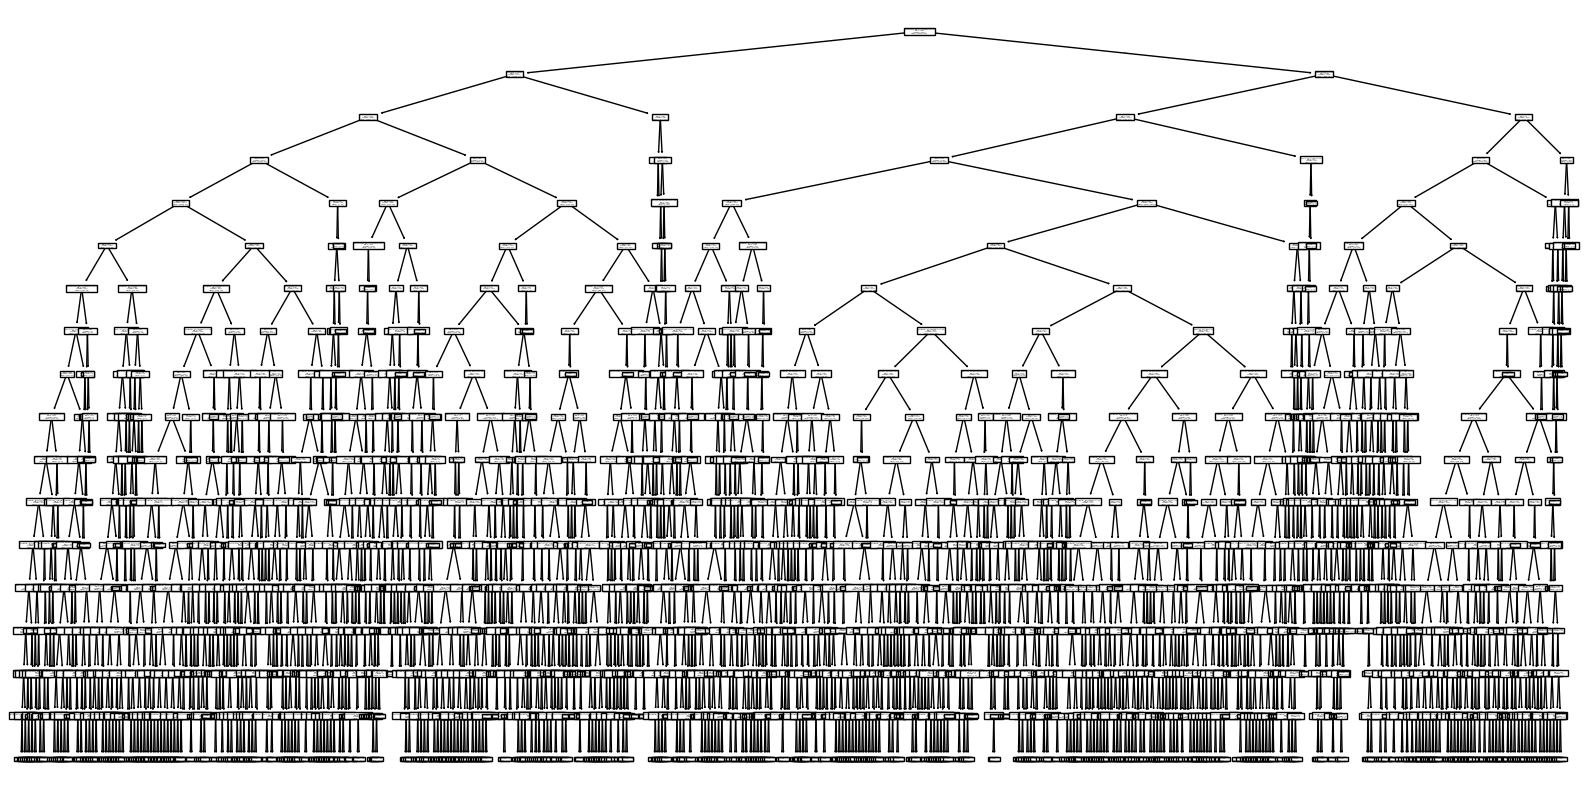

In [41]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names= X2_train.columns)

### 배깅, 부스팅, 랜덤

In [42]:
from sklearn.ensemble import BaggingClassifier

In [45]:
bc = BaggingClassifier(n_estimators=100, n_jobs=1, random_state=7)
bc.fit(X2_train, y2_train)
pred = bc.predict(X2_test)
print(accuracy_score(y2_test, pred))
print(classification_report(y2_test, pred))

0.8429726686457161
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      7459
        True       0.69      0.60      0.64      2310

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [46]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.05, random_state=8, n_jobs=-1)
xgb.fit(X2_train, y2_train)
pred = bc.predict(X2_test)
print(accuracy_score(y2_test, pred))
print(classification_report(y2_test, pred))

0.8429726686457161
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      7459
        True       0.69      0.60      0.64      2310

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=100, random_state=5, n_jobs=-1)
rfc.fit(X2_train, y2_train)
pred = bc.predict(X2_test)
print(accuracy_score(y2_test, pred))
print(classification_report(y2_test, pred))

0.8429726686457161
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      7459
        True       0.69      0.60      0.64      2310

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769

